***
# <font color=blue>UNSUPERVISED LEARNING</font>
# <font color=blue>Practice with PCA</font>
# <font color=blue>(lecturer version)</font>
<div style="text-align: right"><font color=magenta>Andrea De Simone</font></div>
***

In [30]:
import numpy as np  
import pandas as pd  
from scipy import ndimage
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import datasets

***
# 1. PCA on IRIS data

## 1.1 Load IRIS Dataset

In [31]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [32]:
def scatter_plot(X):
    
    fig, ax = plt.subplots()
    ax.set_xlabel('$x_3$',size=16)
    ax.set_ylabel('$x_4$',size=16)
    
    ax.scatter(X[:,2], X[:,3], c='blue', alpha=1, marker='x')
    plt.show() 

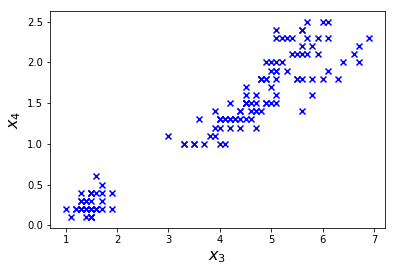

In [33]:
scatter_plot(X)

## 1.2 Covariance matrix

In [34]:
# Standardize features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

### <font color='magenta'>>>> Q1: Compute the covariance matrix 'Sigma' out of 'X_norm' </font>

In [35]:
# Compute the covariance matrix

# Stard Edit  
Sigma = X_norm.T.dot(X_norm) / X_norm.shape[0]
# End Edit

print(Sigma)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


## 1.3 Diagonalization

In [36]:
eigenValues, eigenVectors = np.linalg.eigh(Sigma)

# Sort in descending order of eigenvalues
idx = eigenValues.argsort()[::-1]  # list reverse
eigenValues = eigenValues[idx]
V = eigenVectors[:,idx]

print("Eigenvalues = ",eigenValues)
print("Eigenvectors = \n",V)

Eigenvalues =  [ 2.91081808  0.92122093  0.14735328  0.02060771]
Eigenvectors = 
 [[-0.52237162  0.37231836  0.72101681  0.26199559]
 [ 0.26335492  0.92555649 -0.24203288 -0.12413481]
 [-0.58125401  0.02109478 -0.14089226 -0.80115427]
 [-0.56561105  0.06541577 -0.6338014   0.52354627]]


In [37]:
# Using SVD
#UU, SS, VV = np.linalg.svd(Sigma)
#VV.dot(Sigma).dot(VV.T)

In [38]:
# check diagonalization
V.T.dot(Sigma).dot(V)

array([[  2.91081808e+00,   3.33066907e-16,  -1.11022302e-16,
          2.22044605e-16],
       [  3.33066907e-16,   9.21220931e-01,   8.32667268e-17,
          1.52655666e-16],
       [ -1.94289029e-16,   1.31838984e-16,   1.47353278e-01,
          6.93889390e-18],
       [  2.62810607e-16,   1.26634814e-16,   4.42354486e-17,
          2.06077072e-02]])

## 1.4 Project and recover data

In [39]:
# Set number of principal components
k=2

# Projection matrix
W = V[:,:k]

print(W)

[[-0.52237162  0.37231836]
 [ 0.26335492  0.92555649]
 [-0.58125401  0.02109478]
 [-0.56561105  0.06541577]]


### <font color='magenta'>>>> Q2: Compute the projected data Z along principal components </font>

In [40]:
# Projected data

# Start Edit
Z = X_norm.dot(W)
# End Edit

print(Z[:3])

[[ 2.26454173  0.5057039 ]
 [ 2.0864255  -0.65540473]
 [ 2.36795045 -0.31847731]]


In [41]:
# Recover data
X_approx = Z.dot(W.T)
X_approx[:10]

array([[-0.99464948,  1.06443573, -1.30560624, -1.24776881],
       [-1.33390869, -0.05714369, -1.2265688 , -1.22297912],
       [-1.35552506,  0.32884265, -1.38309889, -1.36017238],
       [-1.41786717,  0.07428633, -1.35146108, -1.3409175 ],
       [-0.99660128,  1.25363164, -1.37425242, -1.30697852],
       [-0.51620615,  1.95078853, -1.17147437, -1.07178148],
       [-1.24980914,  0.71310207, -1.42000663, -1.37844378],
       [-1.07470438,  0.81747392, -1.29320617, -1.24728778],
       [-1.63111533, -0.39685376, -1.38437415, -1.39627698],
       [-1.31033493,  0.16116699, -1.28164028, -1.26728661]])

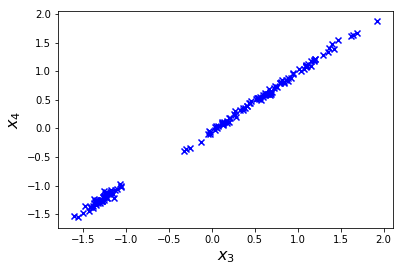

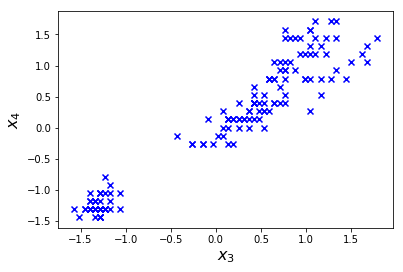

In [42]:
scatter_plot(X_approx)
scatter_plot(X_norm)

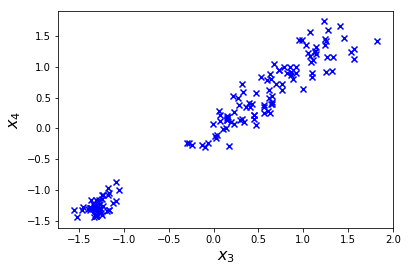

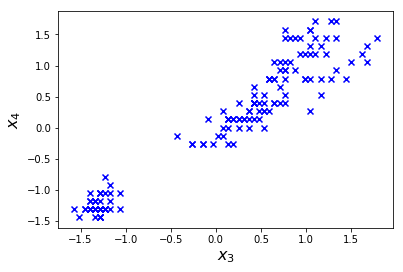

In [15]:
# Set number of principal components
k=3

# Projection matrix
W = V[:,:k]
Z = X_norm.dot(W)
X_approx = Z.dot(W.T)

scatter_plot(X_approx)
scatter_plot(X_norm)

## 1.5 Explained Variance

### <font color='magenta'>>>> Q3: Compute the % of variance explained for k=1,2,3</font>

In [16]:
# Start Edit
tot = np.sum(eigenValues)

eigenvalue_fractions = [(i/tot)*100 for i in eigenValues]
var_explained = np.cumsum(eigenvalue_fractions)

print(eigenvalue_fractions)
print(var_explained)
# End Edit

[72.770452093801367, 23.030523267680618, 3.6838319576273642, 0.51519268089065362]
[  72.77045209   95.80097536   99.48480732  100.        ]


In [17]:
# Alternative method
1-np.sum(np.square((X_norm-X_approx))) / np.sum(np.square(X_norm))

0.9948480731910937

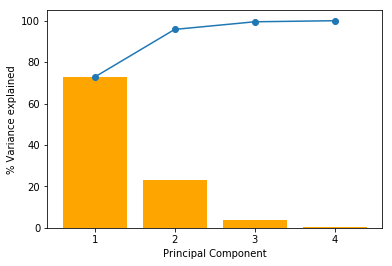

In [18]:
D = X.shape[1]
fig,ax = plt.subplots()

ax.bar(range(D),eigenvalue_fractions, color='orange')
ax.plot(range(D), var_explained, marker="o")

ax.set_xlabel("Principal Component")
ax.set_ylabel("% Variance explained")

ax.set_xticks(range(D))
ax.set_xticklabels(range(1,D+1))
plt.show()

***
# 2. PCA on Faces

## 2.1 Load Dataset 'Faces'

In [19]:
# Load data
X = np.loadtxt('dataset_faces.csv', delimiter=',')
print(X[:2])
print(X.shape) # 10 faces, each consists of 32x32 grayscale pixel values

[[-73.86631387 -72.86631387 -68.86631387 ..., -79.86631387 -81.86631387
  -83.86631387]
 [ 22.13368613  21.13368613  20.13368613 ..., -83.86631387 -86.86631387
  -80.86631387]]
(10, 1024)


In [20]:
def plot_faces(X):
    
    N_faces = 10
    fig, ax = plt.subplots(1,N_faces,figsize=(16,4))

    for i in range(N_faces):

        face = np.reshape(X[i,:], (32, 32))  
        rotated_face = ndimage.rotate(face, 90)
        ax[i].imshow(rotated_face, origin="lower", cmap='gray')
        ax[i].set_axis_off()

    plt.show()

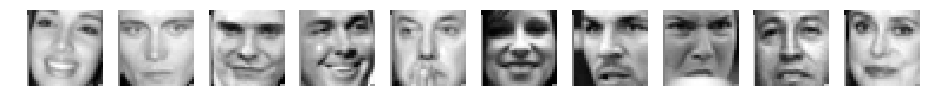

In [21]:
plot_faces(X)

In [22]:
# Normalize Features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Covariance Matrix
Sigma = X_norm.T.dot(X_norm) / X_norm.shape[0]

# Diagonalization
eigenValues, eigenVectors = np.linalg.eigh(Sigma)

# Sort in descending order of eigenvalues
idx = eigenValues.argsort()[::-1]  # list reverse
eigenValues = eigenValues[idx]
V = eigenVectors[:,idx]

## 2.2 Vary the number of principal components

### <font color='magenta'>>>> Q4: for what number of principal components more than 95% of the variance is explained?</font>

In [23]:
# Start Edit
tot = np.sum(eigenValues)
eigenvalue_fractions = [(i/tot)*100 for i in eigenValues]
var_explained = np.cumsum(eigenvalue_fractions)

print(var_explained[:10])
# End Edit

[  34.94695201   53.93081784   68.45703002   78.63033105   85.1366751
   91.56082768   95.50575435   98.51346267  100.          100.        ]


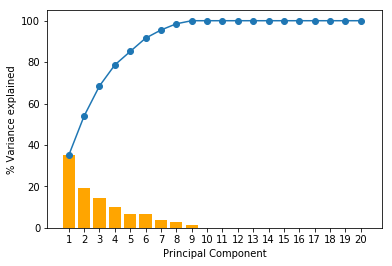

In [24]:
max_pc=20
fig,ax = plt.subplots()

ax.bar(range(max_pc),eigenvalue_fractions[:max_pc], color='orange')
ax.plot(range(max_pc), var_explained[:max_pc], marker="o")

ax.set_xlabel("Principal Component")
ax.set_ylabel("% Variance explained")

ax.set_xticks(range(max_pc))
ax.set_xticklabels(range(1,max_pc+1))
plt.show()

% of variance explained: 68.5%


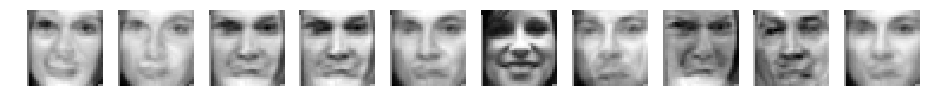

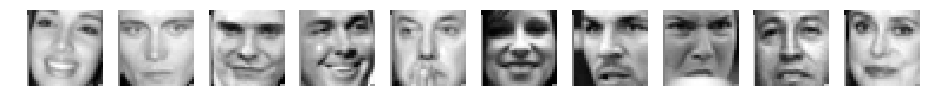

In [25]:
# Set number of principal components
k=3

# Projection matrix
W = V[:,:k]

# Projected data
Z = X_norm.dot(W)

# Recovered data
X_approx = Z.dot(W.T)

print("% of variance explained: {:.1f}%".format(var_explained[k-1]))

plot_faces(X.mean(axis=0)+ X_approx*X.std(axis=0))
plot_faces(X)

% of variance explained: 85.1%


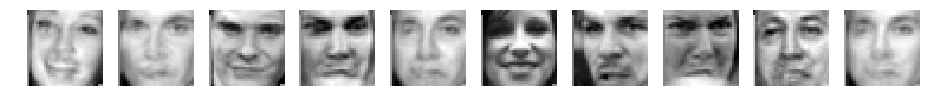

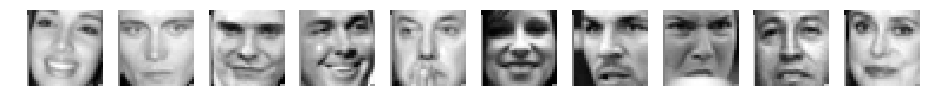

In [26]:
# Set number of principal components
k=5

# Projection matrix
W = V[:,:k]

# Projected data
Z = X_norm.dot(W)

# Recovered data
X_approx = Z.dot(W.T)

print("% of variance explained: {:.1f}%".format(var_explained[k-1]))

plot_faces(X.mean(axis=0)+ X_approx*X.std(axis=0))
plot_faces(X)

% of variance explained: 100.0%


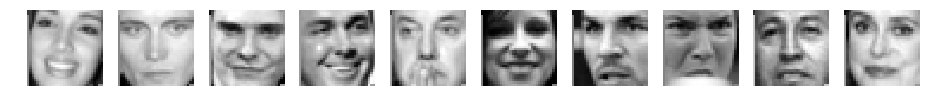

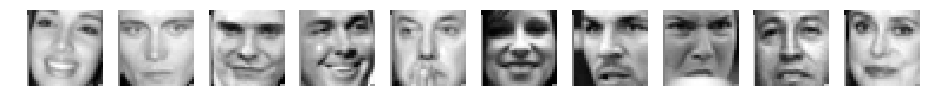

In [27]:
# Set number of principal components
k=10

# Projection matrix
W = V[:,:k]

# Projected data
Z = X_norm.dot(W)

# Recovered data
X_approx = Z.dot(W.T)

print("% of variance explained: {:.1f}%".format(var_explained[k-1]))

plot_faces(X.mean(axis=0)+ X_approx*X.std(axis=0))
plot_faces(X)